# Diffusion Training Loss
Load the diffusion training loss log stored under `model/diffusion/training_loss.json` and plot the epoch-wise loss curve.

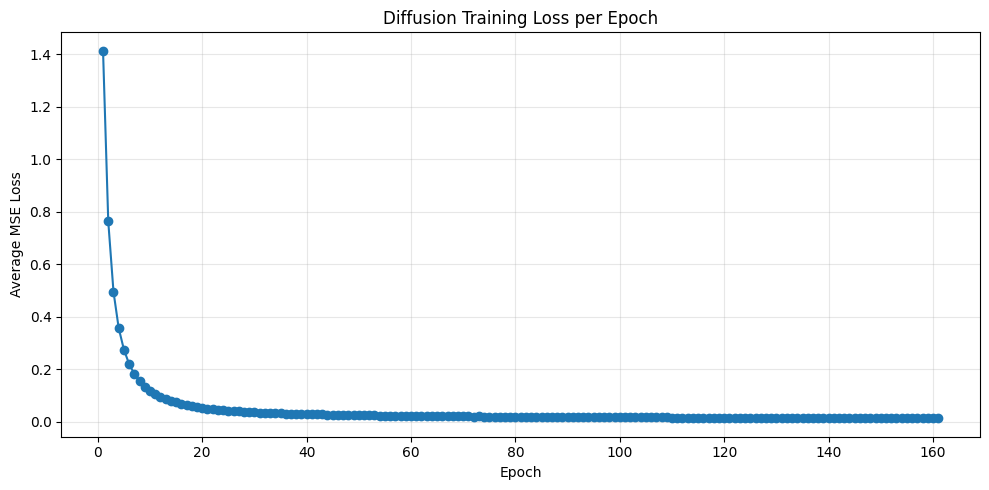

In [2]:
from pathlib import Path
import json
import matplotlib.pyplot as plt

loss_path = Path('../model/diffusion/training_loss.json')
if not loss_path.exists():
    raise FileNotFoundError(f'Cannot find loss log at {loss_path}. Run diffusion training first.')

with open(loss_path, 'r') as f:
    raw_history = json.load(f)

records = sorted((entry['epoch'], entry['loss']) for entry in raw_history.values())
if not records:
    raise ValueError('Loss history is empty. Check your training run.')

epochs, losses = zip(*records)

%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(epochs, losses, marker='o')
plt.title('Diffusion Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average MSE Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()